# Kou, Rui - Homework 1

### Submission
Replace Last Name, First Name above with your name. When you complete this homework, please click "File" -> "Print Preview". Print the resulting browser tab (double check that all code / markdown is there and that plots are visible). Submit a physical copy of your homework **in class on Wednesday 30th January**.

### R versus Python
You may complete this homework in either R or python. The current notebook is written in R. If you are completing your homework in R, you can simply modify this notebook with your answers. If you are completing your homework in python, initiate a Jupyter python notebook and write your answers there.

### Background Reading for Problems
- Section 22.1 - 22.5 in "Numerical Analysis" by Lange.

## Question 1: Inverse Method for geometric random variates

1. Using the inverse method and the language $Unif[0,1]$ generator (runif in R, numpy.random.uniform in python), write a function to generate random variates from a geometric distribution with probability of success $p$. Both $p$ and the number of random variates should be arguments to your function. There are multiple ways of defining the geometric distribution, here please use the definition that it is the number of *failures* until the first success.
2. For some particular $p$ of your choosing, make a plot of the proportion of random variates taking each value and plot the true geometric probability mass function on top to confirm that the generator is working.
3. Compare the speed of your geometric generator to the language generator (rgeom in R, numpy.random.geometric in python). Try to make your generator computationally competitive with the built in generator by avoiding for loops and other slow code.
4. How do you think your method would compare to an approach that generates a sequence of random trials with probability $p$ of success until the first success and then records the number of failures until the first success? Why?

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import timeit

### Note: Geometric Distribution, n=number of failures until first success, p=success probability
-  Pmf = p*(1-p)^n 
-  Cdf = 1-(1-p)^(n+1)  
-  Invert cdf function, x = log(1-y)/log(1-p)-1
-  RN = Floor [log(U)/log(1-p)-1]+1


In [2]:
n = 1000000
p = 0.3

#### Answer: 1-1 Geometry RN generator function

In [3]:
def geo_rand(p=0.3,n=100):
    U = np.random.uniform(size=n)
    Y = np.floor(np.log(U)/np.log(1-p))
    return Y

#### Answer: 1-2 Performance of coded Geometric Distribution RN generator :

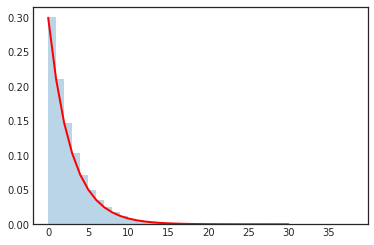

In [4]:
S = geo_rand(p,n)
kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=int(np.max(S)))
plt.hist(S, **kwargs);
x = np.linspace(0, 30,31)
y = p*(1-p)**x
plt.plot(x, y, linewidth=2, color='r')
plt.show()

In [5]:
mycode = '''def geo_rand(p=0.3,n=100):
    U = np.random.uniform(size=n)
    Y = np.floor(np.log(U)/np.log(1-p))
    return Y
    S = geo_rand(0.3,1000000)'''

#### Answer 1-3: Time of the coded Goemetric Distribution RN generator:

In [6]:
timeit.timeit(mycode, number = 1000)

0.0002519650151953101

#### Answer 1-3: Performance of the built in NP geometric RN generator:

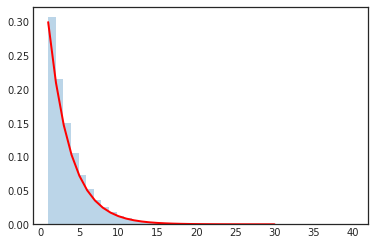

In [7]:
S2=np.random.geometric(p,n)
kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=int(np.max(S2)))
plt.hist(S2, **kwargs);
x = np.linspace(1, 30,30)
y = p*(1-p)**(x-1)
plt.plot(x, y, linewidth=2, color='r')
plt.show()

In [8]:
mysetup = '''import numpy as np'''
mystmt = '''np.random.geometric(0.3,100000)'''
timeit.timeit(setup = mysetup,stmt = mystmt, number = 1000)

5.5804017079935875

#### Answer 1-3: It appears the self coded geometric RN generator is much faster than the NP function

#### Answer 1-4: The approach of sequence of random trials will be much slower, because the results are generator in a sequencial manner, later trials needs to wait until previous trial is done.

## Question 2: Simulation Study of the LLN and CLT

1. Create an $n \times m$ matrix $X$ with $n=100$ and $m=1000$ and each entry $X_{ij} \sim \text{Exp}(\lambda)$ (rexp in R, numpy.random.exponential in python). Set the rate parameter to be $\lambda=0.5$ so that the mean of $X_{ij}$ is $2$. (Again, beware that there are multiple ways of parameterizing the exponential distribution and python does it differently to R). <br>If you would like some intuition for this simulation consider the following situation: we survey $100$ bus stops in a city, and at each bus stop, we measure the waiting times between each bus until the stop has been visited by $1000$ buses. The exponential distribution is often used to model waiting times (bus arrival times, next stock trade, store visits, website visits, product lifetimes etc.). In this simple simulation study, we suppose that the waiting times are the same at each bus stop and throughout the day. 
2. Compute the running mean of each row of $X$ to produce a new matrix $Y$ which is again $100 \times 1000$. Specifically the row $i$, column $k$ entry of $Y$ is
\begin{equation*}
Y_{ik} = \frac{1}{k} \sum_{j=1}^k X_{ij}
\end{equation*}
Try to avoid using nested for loops.
3. Plot each row of $Y$ (on the y-axis) against the column number (on the x-axis). This will result in 1 plot with 100 lines. Then make three histograms 1) first column of $Y$, 2) 20th column of $Y$, and 3) the last column of $Y$. Your images should roughly look like what is below. (If you want to make the results clearer and prettier, draw all histograms or density estimators on top of each other with different colors, see lecture notes from the first class [here](https://nbviewer.jupyter.org/urls/david-jones-statistics.github.io/statcomp/lectures/topic1-intro/00intro.ipynb) for how to do this with ggplot in R or [here](https://jakevdp.github.io/PythonDataScienceHandbook/04.05-histograms-and-binnings.html) for code in python from VanderPlas)
4. Take the variance of each column of $Y$ to produce a vector $\boldsymbol{u}$ giving the running variance of the means across the $n$ bus stops. Plot $1/\boldsymbol{u}_k$ (on the y-axis) against $k$ (on the x-axis), and add a line showing $k\lambda^2$, for $k=1,\dots,m$. 
5. Explain what the simulation results in parts 3 and 4 are showing.

#### Answer 2-1: Initialize the matrix with exp RN generator, note that scale factor = 1/lamba

In [9]:
wait_time = np.random.exponential(2,(100,1000))
print(wait_time.mean())
print(wait_time.shape)

1.997276887239723
(100, 1000)


In [10]:
wait_time

array([[ 1.06637374,  1.22526081,  0.34480132, ...,  0.63567378,
         0.497746  ,  1.71928612],
       [ 2.34356319,  0.23240086,  3.0305113 , ...,  5.70397539,
         2.67715011,  0.32718232],
       [ 1.03231271,  0.53483872,  2.48066771, ...,  0.67066023,
        14.54009282,  0.36394609],
       ...,
       [ 1.45136617,  1.46140357,  2.11481623, ...,  3.92002246,
         2.21843285,  4.26479166],
       [ 0.65618801,  2.11557257,  1.64028199, ...,  1.44041716,
         4.15800031,  2.48059754],
       [ 1.35135761,  1.42894718,  6.47130797, ...,  0.44683939,
         1.82207087,  1.44410819]])

#### Answer 2-2: Calculate the running mean

In [11]:
time_cum=wait_time.cumsum(axis = 1)
for i in range(time_cum.shape[1]):
    time_cum[:,i]=time_cum[:,i]/(i+1)
time_cum

array([[1.06637374, 1.14581728, 0.87881196, ..., 1.97093069, 1.96945603,
        1.96920586],
       [2.34356319, 1.28798203, 1.86882512, ..., 2.02447881, 2.02513213,
        2.02343418],
       [1.03231271, 0.78357571, 1.34927304, ..., 1.99461196, 2.00717   ,
        2.00552678],
       ...,
       [1.45136617, 1.45638487, 1.67586199, ..., 1.86583322, 1.86618617,
        1.86858478],
       [0.65618801, 1.38588029, 1.47068086, ..., 1.92571518, 1.9279497 ,
        1.92850235],
       [1.35135761, 1.3901524 , 3.08387092, ..., 2.00186534, 2.00168536,
        2.00112779]])

#### Answer 2-3: Plot each row and histogram of column number 1,20,1000

<function matplotlib.pyplot.show(*args, **kw)>

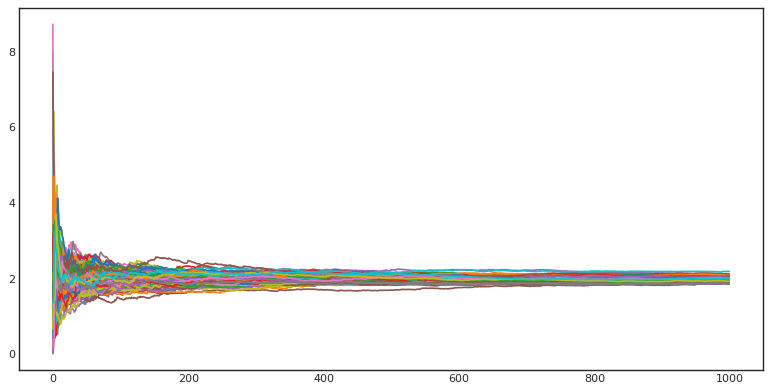

In [12]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(time_cum.T)
plt.show

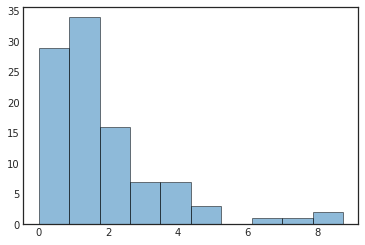

In [13]:
kwargs = dict(histtype='bar', alpha=0.5,edgecolor='black')
plt.hist(time_cum[:,0], **kwargs);

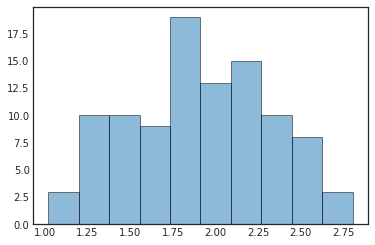

In [14]:
plt.hist(time_cum[:,19], **kwargs);

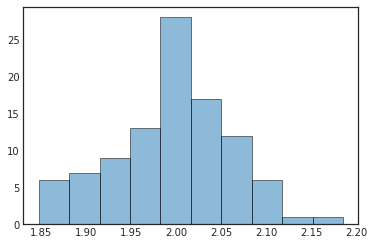

In [15]:
plt.hist(time_cum[:,999], **kwargs);

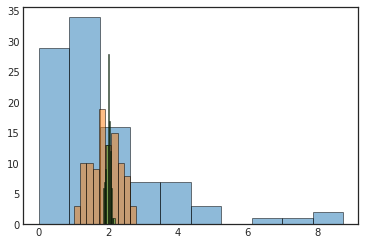

In [16]:
plt.hist(time_cum[:,0], **kwargs);
plt.hist(time_cum[:,19], **kwargs);
plt.hist(time_cum[:,999], **kwargs);

#### Answer 2-4: Plot 1/u, where u is column variance and k*lambda^2

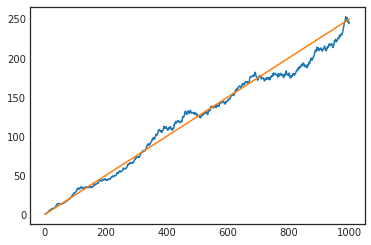

In [17]:
u=time_cum.var(axis = 0)
plt.plot(1/u)
x = np.linspace(1,1000,1000)
y = x*0.25
plt.plot(y)

#### Answer 2-5: 
-  #### for each of the bus stop, when we sample more and more wait time, they all approach to 2, which is the mean of the distribution we are sampling from
-  #### when we take 1 sample (wait time) at each bus station, they follow exponential distribution
-  #### when we take 1000 sample (wait time) at each bus station, the mean (average wait time) follows Gaussian distribution, which proves the central limit theorem
-  #### The variance of the mean follows 1/lambda^2

(requires internet connection to view)

<img src="https://david-jones-statistics.github.io/statcomp/hw/hw1_plot1.png">

(requires internet connection to view)

<img src="https://david-jones-statistics.github.io/statcomp/hw/hw1_plot2.png">